#  Aviation Accident Analysis (1962–2023)

##  1. Business Understanding

###  Project Overview

A new company is preparing to enter the aviation industry and is currently in the **decision-making phase** regarding **fleet acquisition** and **operational planning**. While the industry presents immense opportunities for profit and expansion, **aviation safety** remains a primary concern. Aircraft accidents not only lead to the tragic loss of life but also cause severe reputational damage, legal implications, and financial losses. Therefore, minimizing the risk of such incidents is a **core strategic goal** for the company.

This project aims to analyze over **60 years of aviation accident data** sourced from the **National Transportation Safety Board (NTSB)** to derive **data-driven insights** into:

- The **root causes** of aviation accidents
- The **types of aircraft** most involved in accidents
- The **safest aircraft models and manufacturers**
- Accident trends by **location**, **weather**, **phase of flight**, and **purpose of flight**
- **Fatality rates** and the **severity** of different types of incidents

### 🛠 Why This Analysis Matters

Entering the aviation industry without understanding historical risks would be like flying blind. This analysis will help the business:

1. **Reduce Risk Exposure**  
   By identifying aircraft types or operational conditions that frequently result in accidents, the company can avoid investing in high-risk assets or routes.

2. **Improve Procurement Strategy**  
   With insights into the safest aircraft models, the business can make more **informed purchasing decisions** that prioritize **safety, performance, and reliability**.

3. **Enhance Operational Safety Protocols**  
   By understanding accident patterns across weather conditions, flight phases, and human factors, the company can design **training programs**, **safety checklists**, and **emergency response procedures** that mitigate risk.

4. **Build Customer and Investor Trust**  
   Demonstrating a strong, data-backed commitment to safety can **enhance the brand image**, foster **customer confidence**, and attract **investors or partners** seeking responsible operators.

###  Business Questions We Aim to Answer

- What are the **most common causes** of aviation accidents?
- Which aircraft **types** and **manufacturers** are most often involved in fatal incidents?
- Which **U.S. states** and **regions** have recorded the highest number of accidents?
- How does accident frequency and severity vary by **flight type** (private, commercial, military)?
- What are the trends in aviation safety over the years?
- Which aircrafts or manufacturers have the **lowest accident-to-fatality ratio**, indicating better survivability?

### Final Deliverables

The findings of this project will be communicated via:

- An **interactive dashboard** for stakeholder exploration
- A **summary presentation** tailored to non-technical executives
- A **recommendation report** on aircraft procurement
- A clean, well-documented **GitHub repository** for transparency

---

>  This analysis goes beyond just numbers — it's a decision-making tool for the **future of aviation safety and investment**.


#  2. Data Understanding

In this section, we perform an initial exploration of the dataset to understand its structure, contents, and quality. This includes:
- Viewing column names and data types
- Previewing the first few records
- Identifying missing values
- Understanding the nature of each variable (categorical, numerical, textual)
- Flagging early data quality issues such as duplicates, inconsistent formats, or suspicious values


In [13]:
# Import essential libraries
import pandas as pd
import numpy as np

# Increase display width to view all columns
pd.set_option('display.max_columns', None)

# Try loading with fallback encodings
try:
    df = pd.read_csv('data/AviationData.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('data/AviationData.csv', encoding='latin1')  # handles funky characters
    except Exception as e:
        print(" Still can't load the dataset:", e)
        df = pd.DataFrame()  # create empty DataFrame to avoid crashing

# Check if data loaded
if not df.empty:
    print(f" Data loaded: {df.shape[0]} rows, {df.shape[1]} columns.")

    # Preview data
    print("\n First 5 records:")
    print(df.head())

    # Column types
    print("\n Column data types:")
    print(df.dtypes)

    # Missing values
    print("\n Missing values per column:")
    print(df.isnull().sum())

    # Duplicates
    print("\n Duplicate rows:", df.duplicated().sum())
else:
    print(" No data to explore.")


/home/frank/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


✅ Data loaded: 88889 rows, 31 columns.

🔍 First 5 records:
         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country Latitude Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States      NaN       NaN          NaN   
1   BRIDGEPORT, CA  United States      NaN       NaN          NaN   
2    Saltville, VA  United States  36.9222  -81.8781          NaN   
3       EUREKA, CA  United States      NaN       NaN          NaN   
4       Canton, OH  United States      NaN       NaN          NaN   

  Airport.Name Injury.Severity Aircraft.damage Aircraft.Category  \
0          NaN        Fatal(2)       Destroyed   

## Step 3: Data Preparation
### Objective:
Clean and prepare the AviationData.csv dataset to ensure it's free of:

Missing/null values

Duplicates

Incorrect data types

### (i) Check for Null Values
We begin by inspecting the dataset for missing values using .isnull().sum(). This helps us identify columns that may require imputation or removal, depending on the percentage of missing data and its relevance to our analysis.

In [14]:
#  Check for null values across all columns
null_counts = df.isnull().sum().sort_values(ascending=False)

#  Display columns with the highest number of missing values
null_counts[null_counts > 0]


Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
dtype: int64

### Drop Columns with Too Many Nulls

In [15]:
# Drop columns with more than 50% missing data
threshold = len(df) * 0.5
cols_to_drop = df.columns[df.isnull().sum() > threshold]

df.drop(columns=cols_to_drop, inplace=True)

"""
We drop columns with more than 50% missing values, as they provide limited analytical value
and could introduce noise or misleading patterns if imputed poorly.
"""


'\nWe drop columns with more than 50% missing values, as they provide limited analytical value\nand could introduce noise or misleading patterns if imputed poorly.\n'

### Fill Injury Columns with 0

In [16]:
# Fill injury-related nulls with 0 assuming no injury occurred
injury_cols = [
    'Total.Fatal.Injuries', 
    'Total.Serious.Injuries', 
    'Total.Minor.Injuries', 
    'Total.Uninjured'
]

df[injury_cols] = df[injury_cols].fillna(0)

"""
Injury-related fields are often null when no injuries were reported.
Filling with 0 prevents distortion in statistics and allows for accurate injury analysis.
"""


'\nInjury-related fields are often null when no injuries were reported.\nFilling with 0 prevents distortion in statistics and allows for accurate injury analysis.\n'

### Fill Categorical Nulls with 'Unknown' or Mode

In [17]:
#  Fill categorical columns with 'Unknown' or most frequent category (mode)
categorical_cols = [
    'Aircraft.damage', 
    'Weather.Condition', 
    'Purpose.of.flight', 
    'Engine.Type', 
    'Report.Status',
    'Amateur.Built',
    'Country',
    'Make',
    'Model',
    'Injury.Severity',
    'Location',
    'Registration.Number'
]

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        most_frequent = df[col].mode()[0]
        df[col].fillna(most_frequent, inplace=True)

"""
Using mode (most common value) ensures we don't introduce unrealistic categories while maintaining consistency.
"""


"\nUsing mode (most common value) ensures we don't introduce unrealistic categories while maintaining consistency.\n"

### Final Null Check

In [18]:
# Verify no null values remain
df.isnull().sum().sort_values(ascending=False)


Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Number.of.Engines          6084
Registration.Number           0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Model                         0
Make                          0
Report.Status                 0
Amateur.Built                 0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Event.Id                      0
dtype: int64

### Fill 'Number.of.Engines' with Median

In [19]:
# Fill 'Number.of.Engines' with median (suitable for skewed numeric fields)
median_engines = df['Number.of.Engines'].median()
df['Number.of.Engines'].fillna(median_engines, inplace=True)

"""
Using median reduces distortion from outliers in numeric fields like engine counts.
"""


'\nUsing median reduces distortion from outliers in numeric fields like engine counts.\n'

### Fill 'Broad.phase.of.flight' and 'Publication.Date' with Mode

In [20]:
# These fields are informative for accident context, so fill with mode
df['Broad.phase.of.flight'].fillna(df['Broad.phase.of.flight'].mode()[0], inplace=True)
df['Publication.Date'].fillna(df['Publication.Date'].mode()[0], inplace=True)

"""
These fields help describe accident dynamics and timelines, so we impute conservatively using the mode.
"""


'\nThese fields help describe accident dynamics and timelines, so we impute conservatively using the mode.\n'

### Drop 'Airport.Code' and 'Airport.Name'

In [21]:
# Drop airport info due to high nulls and limited value for core risk analysis
df.drop(columns=['Airport.Code', 'Airport.Name'], inplace=True)

"""
Airport-specific fields are not central to aircraft safety patterns and have too many missing values for reliable use.
"""


'\nAirport-specific fields are not central to aircraft safety patterns and have too many missing values for reliable use.\n'

### Final Null & Structure Check

In [22]:
#Re-confirm no remaining nulls
print("Remaining nulls:\n", df.isnull().sum().sort_values(ascending=False))

# 🔍 Check shape and column overview
print(f"\nDataset shape: {df.shape}")
df.info()


Remaining nulls:
 Publication.Date          0
Model                     0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Amateur.Built             0
Report.Status             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Event.Id                  0
dtype: int64

Dataset shape: (88889, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      

### (ii) Handle Duplicates
Duplicate rows can introduce bias and skew statistical summaries. After checking for duplicates using .duplicated(), we drop them with .drop_duplicates() to ensure data integrity.

In [24]:
#  Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

# Drop duplicate rows, if any
df.drop_duplicates(inplace=True)


Duplicate rows: 0


### (iii) Inspect and Correct Data Types
Date columns should be in datetime64 format for time-based analysis. We use pd.to_datetime() with errors='coerce' to safely convert and handle invalid entries.

In [27]:
#  Check current data types
df.dtypes

# Convert date columns to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')

"""
We convert 'Event.Date' and 'Publication.Date' to datetime format so we can analyze trends over time.
We use errors='coerce' to safely handle any invalid date entries by converting them to NaT (Not a Time).
"""
    


"\nWe convert 'Event.Date' and 'Publication.Date' to datetime format so we can analyze trends over time.\nWe use errors='coerce' to safely handle any invalid date entries by converting them to NaT (Not a Time).\n"

### (iv) Final Sanity Check

In [28]:
# Re-check nulls and data types to confirm all changes
print("Remaining null values:\n", df.isnull().sum().sort_values(ascending=False))
print("\nUpdated data types:\n", df.dtypes)


Remaining null values:
 Publication.Date          0
Model                     0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Amateur.Built             0
Report.Status             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Event.Id                  0
dtype: int64

Updated data types:
 Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.d

## Step 4: Exploratory Data Analysis (EDA)
### Objective:
Gain insights into accident patterns by exploring temporal trends, severity, aircraft types, weather, and geographical distribution.

EDA Plan:
Overview of Target Variables

Accidents Over Time

Injury Severity Distribution

Top Aircraft Manufacturers Involved

Accidents by Weather Condition

Accidents by Broad Phase of Flight

Top Countries with Most Accidents

### 4.1 Overview of Casualty Statistics

We begin our analysis by exploring the distribution of casualties in aircraft accidents. This includes:
- Fatal injuries
- Serious injuries
- Minor injuries
- Uninjured individuals

Understanding these distributions provides insight into the typical impact of aviation incidents.


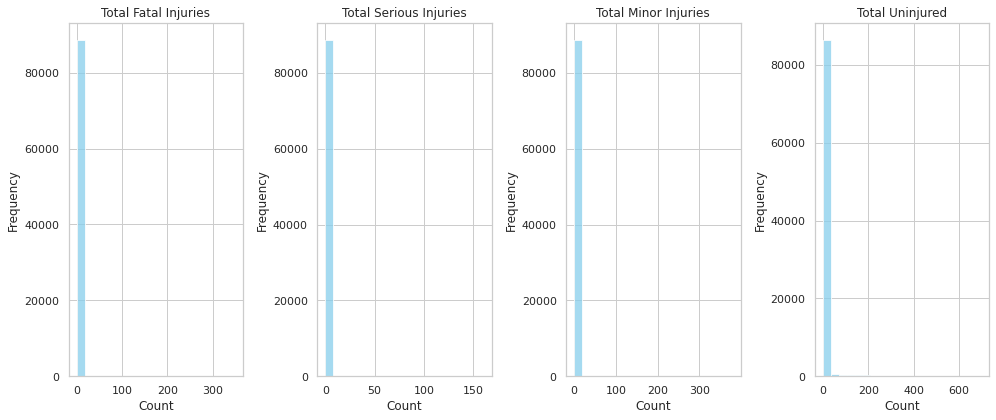

'\nThese histograms give us a snapshot of the casualty spread. Many accidents have zero fatalities or injuries, while a few have high counts, indicating rare but severe incidents.\n'

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Casualty columns
casualty_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# 📊 Plot distributions
plt.figure(figsize=(14, 6))
for i, col in enumerate(casualty_cols):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[col], bins=20, kde=False, color='skyblue')
    plt.title(col.replace('.', ' '))
    plt.xlabel('Count')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

"""
These histograms give us a snapshot of the casualty spread. Many accidents have zero fatalities or injuries, while a few have high counts, indicating rare but severe incidents.
"""


## 4.2 Trends in Aviation Accidents Over Time

We now explore the number of aviation accidents by year. This analysis helps us identify patterns, such as whether incidents have increased, decreased, or remained consistent over time. It also provides a historical context to safety regulations or advancements in aircraft technology.


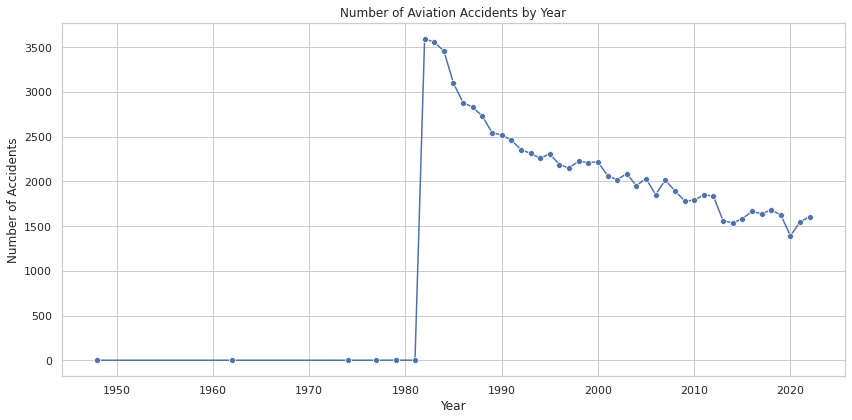

'\nThis line plot reveals historical patterns in aviation accidents and helps pinpoint years with significant spikes or drops.\n'

In [31]:
# 🗓️ Convert 'Event.Date' to datetime (if not already done)
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# 🔄 Extract Year from Event Date
df['Year'] = df['Event.Date'].dt.year

# 🧮 Count number of accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()

# 📊 Plot trend of accidents over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker='o')
plt.title('Number of Aviation Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

"""
This line plot reveals historical patterns in aviation accidents and helps pinpoint years with significant spikes or drops.
"""


## 4.3 Distribution of Injury Severity

In this section, we explore how injury severities are distributed in aviation accidents. This will help us quantify the proportion of fatal versus non-fatal incidents and guide safety focus areas.


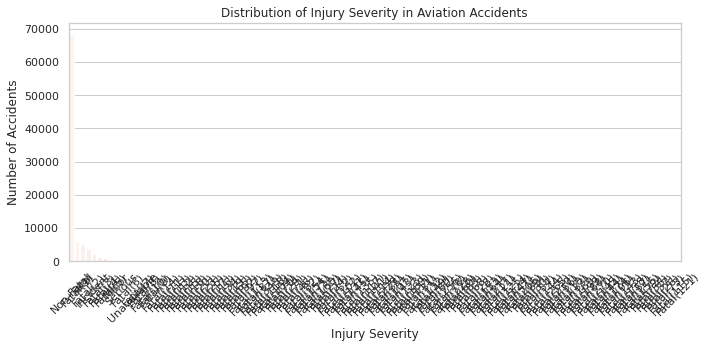

'\nThis bar chart illustrates how many accidents fall into each injury severity category. \nIt highlights the prevalence of serious vs. fatal accidents in the dataset.\n'

In [32]:
# 📊 Count occurrences of each injury severity type
severity_counts = df['Injury.Severity'].value_counts()

# 📈 Plot the distribution using a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='Reds')
plt.title('Distribution of Injury Severity in Aviation Accidents')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""
This bar chart illustrates how many accidents fall into each injury severity category. 
It highlights the prevalence of serious vs. fatal accidents in the dataset.
"""


## 4.4 Accidents by Aircraft Manufacturer

We now analyze which aircraft manufacturers appear most frequently in the accident reports. This may help highlight manufacturers whose aircraft are more likely to be involved in accidents — either due to widespread use or other factors.


In [ ]:
# 🔝 Top 10 most common aircraft manufacturers in accidents
top_makes = df['Make'].value_counts().head(10)

# 📊 Plot as horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette='Blues_d')
plt.title('Top 10 Aircraft Manufacturers Involved in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Manufacturer')
plt.tight_layout()
plt.show()

"""
This horizontal bar chart shows the most frequently reported aircraft manufacturers in accident records.
It helps identify whether certain makes dominate the dataset — possibly due to market share or other reasons.
"""
